In [42]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'IBM', 'MSFT']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [44]:
print(news_table)

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">May-28-22 10:00AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/05/28/amd-investors-should-be-excited-about-these-3-thin/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">AMD Investors Should Be Excited About These 3 Things</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
<tr><td align="right" width="130">09:02AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/10-small-cap-stocks-sell-130203674.html" target="_blank">10 Small-Cap Stocks to Sell Now Before Recession Begins</a></div><div cl

In [45]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])


In [46]:
print(parsed_data)

[['AMZN', 'May-28-22', '09:17AM\xa0\xa0', 'Fintech Stocks To Buy And Watch Or Sell As Competition Intensifies'], ['AMZN', 'May-28-22', '09:02AM\xa0\xa0', '10 Small-Cap Stocks to Sell Now Before Recession Begins'], ['AMZN', 'May-28-22', '08:37AM\xa0\xa0', 'Is Snowflake Stock A Buy Or Sell Amid Software Sector Volatility?'], ['AMZN', 'May-28-22', '08:23AM\xa0\xa0', '2 Growth Stocks to Set You Up for the Next 10 Years'], ['AMZN', 'May-28-22', '07:00AM\xa0\xa0', 'Could This Decision by Amazon Shareholders Boost the Stock?'], ['AMZN', 'May-28-22', '06:13AM\xa0\xa0', "Here's My Top Growth Stock to Buy Now"], ['AMZN', 'May-28-22', '05:54AM\xa0\xa0', "The Perfect Stock-Split Stock for This Wild Market (Hint: It's Not Amazon or Tesla)"], ['AMZN', 'May-28-22', '05:30AM\xa0\xa0', 'Should I Use My 2022 Roth IRA Contribution to Buy Shares of Amazon?'], ['AMZN', 'May-27-22', '06:48PM\xa0\xa0', 'Amazon investor proposal to review plastic use narrowly fails to clear'], ['AMZN', 'May-27-22', '06:48PM\x

In [47]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [48]:
print(df.head())

  ticker       date       time  \
0   AMZN  May-28-22  09:17AM     
1   AMZN  May-28-22  09:02AM     
2   AMZN  May-28-22  08:37AM     
3   AMZN  May-28-22  08:23AM     
4   AMZN  May-28-22  07:00AM     

                                               title  
0  Fintech Stocks To Buy And Watch Or Sell As Com...  
1  10 Small-Cap Stocks to Sell Now Before Recessi...  
2  Is Snowflake Stock A Buy Or Sell Amid Software...  
3  2 Growth Stocks to Set You Up for the Next 10 ...  
4  Could This Decision by Amazon Shareholders Boo...  


In [52]:
vader = SentimentIntensityAnalyzer()

In [53]:
f = lambda title: vader.polarity_scores(title)['compound']

In [54]:
df['compound'] = df['title'].apply(f)

In [55]:
df['date'] = pd.to_datetime(df.date).dt.date

In [69]:
plt.figure(figsize=(10,20))

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [118]:
mean_df = df.groupby(['ticker']).mean().unstack()

In [119]:
mean_df = mean_df.xs('compound', axis="columns")

ValueError: No axis named columns for object type Series

<AxesSubplot:xlabel='None,ticker'>

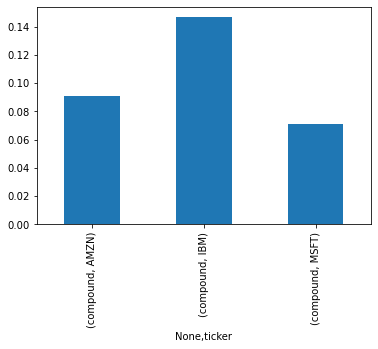

In [120]:
mean_df.plot(kind='bar')

In [121]:
plt.show()